<a name="top"></a>
<div style="width:600 px">

<div style="float:right; width:340 px; height:300px;">
<img src="https://raw.githubusercontent.com/unidata/drilsdown/master/docs/_static/DRILSDOWN_logo.png" alt="DRILSDOWN Logo" style="height: 300px;">
</div>

<div style="float:right; width:98 px; height:98px;">
<img src="https://www.earthcube.org/sites/default/files/doc-repository/logo_earthcube_cube-only_SMALL.png" alt="Earthcube Logo" style="height: 98px;">
</div>


<h1>G5NR KEdot climatology</h1>
<h3>KEdot = projection of CMT on shear</h3>

Part of [this nbviewer repo](http://nbviewer.jupyter.org/github/suvarchal/G5NR_Interactive_notebooks/tree/master/)

-------------

<div style="clear:both"></div>
</div>

<hr style="height:2px;">


### Sections
1. <a href="#meanmap">meanmap (ho hum)</a>
1. <a href="#timeseries">interactive time series</a>

----------------
Imports and setups

In [1]:
import G5NR_utils
import xarray as xr
import holoviews as hv
from holoviews import streams
import geoviews as gv
import numpy as np

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
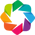

In [2]:
hv.notebook_extension('bokeh')

<a name="meanmap"></a>

# Simple 2-year mean map

In [3]:
# Get the 4-degree dataset here (it is 3.5 GB in size)
# http://weather.rsmas.miami.edu/repository/entry/show?entryid=synth%3A44f12630-3c06-48ea-ac81-1d0cea774d62%3AL1NLRWRvdF9tZXJnZWRfOTB4NDVfZmxpcC5uYw%3D%3D

da=xr.open_dataset('data/SKEdot_merged_90x45_flip.nc')

In [4]:
SKEDOT_ANN = da.SKEDOT.mean(dim='time')
SKEDOT_ANN.name='SKEDOT_ANN'

#SKEDOT_seas=da.groupby('time.season').mean(dim='time')

In [18]:
#with geoviews projection is ugly
skedot_map=SKEDOT_ANN.to_geoimage(hover=True).redim.range(SKEDOT=(-0.5,0.5))

In [19]:
#with holoviews 
skedot_map=hv.QuadMesh(hv.Image(hv.Dataset(SKEDOT_ANN),kdims=['lon','lat']),kdims=['lon','lat'])
skedot_map=skedot_map(plot={'width':800,'height':400,'tools':['hover'],'colorbar':True,'toolbar':'above'},style={'cmap':'RdBu_r'})
skedot_map=skedot_map.redim.range(SKEDOT_ANN=(-0.5,0.5))

In [20]:
coastline=G5NR_utils.coastlines(lon_360=False) #this may download shape files on first invocation
                                   #if data longitudes are -180 to 180 then lon_360=False

In [21]:
skedot_map*coastline

:Overlay
   .QuadMesh.I    :QuadMesh   [lon,lat]   (SKEDOT_ANN)
   .Path.I        :Path   [x,y]
   .Path.II       :Path   [x,y]
   .Path.III      :Path   [x,y]
   .Path.IV       :Path   [x,y]
   .Path.V        :Path   [x,y]
   .Path.VI       :Path   [x,y]
   .Path.VII      :Path   [x,y]
   .Path.VIII     :Path   [x,y]
   .Path.IX       :Path   [x,y]
   .Path.X        :Path   [x,y]
   .Path.XI       :Path   [x,y]
   .Path.XII      :Path   [x,y]
   .Path.XIII     :Path   [x,y]
   .Path.XIV      :Path   [x,y]
   .Path.XV       :Path   [x,y]
   .Path.XVI      :Path   [x,y]
   .Path.XVII     :Path   [x,y]
   .Path.XVIII    :Path   [x,y]
   .Path.XIX      :Path   [x,y]
   .Path.XX       :Path   [x,y]
   .Path.XXI      :Path   [x,y]
   .Path.XXII     :Path   [x,y]
   .Path.XXIII    :Path   [x,y]
   .Path.XXIV     :Path   [x,y]
   .Path.XXV      :Path   [x,y]
   .Path.XXVI     :Path   [x,y]
   .Path.XXVII    :Path   [x,y]
   .Path.XXVIII   :Path   [x,y]
   .Path.XXIX     :Path   [x,y]
   .Path.XXX      :Path   [x,y]
   .Path.XXXI     :Path   [x,y]
   .Path.XXXII    :Path   [x,y]
   .Path.XXXIII   :Path   [x,y]
   .Path.XXXIV    :Path   [x,y]
   .Path.XXXV     :Path   [x,y]
   .Path.XXXVI    :Path   [x,y]
   .Path.XXXVII   :Path   [x,y]
   .Path.XXXVIII  :Path   [x,y]
   .Path.XXXIX    :Path   [x,y]
   .Path.XL       :Path   [x,y]
   .Path.XLI      :Path   [x,y]
   .Path.XLII     :Path   [x,y]
   .Path.XLIII    :Path   [x,y]
   .Path.XLIV     :Path   [x,y]
   .Path.XLV      :Path   [x,y]
   .Path.XLVI     :Path   [x,y]
   .Path.XLVII    :Path   [x,y]
   .Path.XLVIII   :Path   [x,y]
   .Path.XLIX     :Path   [x,y]
   .Path.L        :Path   [x,y]
   .Path.LI       :Path   [x,y]
   .Path.LII      :Path   [x,y]
   .Path.LIII     :Path   [x,y]
   .Path.LIV      :Path   [x,y]
   .Path.LV       :Path   [x,y]
   .Path.LVI      :Path   [x,y]
   .Path.LVII     :Path   [x,y]
   .Path.LVIII    :Path   [x,y]
   .Path.LIX      :Path   [x,y]
   .Path.LX       :Path   [x,y]
   .Path.LXI      :Path   [x,y]
   .Path.LXII     :Path   [x,y]
   .Path.LXIII    :Path   [x,y]
   .Path.LXIV     :Path   [x,y]
   .Path.LXV      :Path   [x,y]
   .Path.LXVI     :Path   [x,y]
   .Path.LXVII    :Path   [x,y]
   .Path.LXVIII   :Path   [x,y]
   .Path.LXIX     :Path   [x,y]
   .Path.LXX      :Path   [x,y]
   .Path.LXXI     :Path   [x,y]
   .Path.LXXII    :Path   [x,y]
   .Path.LXXIII   :Path   [x,y]
   .Path.LXXIV    :Path   [x,y]
   .Path.LXXV     :Path   [x,y]
   .Path.LXXVI    :Path   [x,y]
   .Path.LXXVII   :Path   [x,y]
   .Path.LXXVIII  :Path   [x,y]
   .Path.LXXIX    :Path   [x,y]
   .Path.LXXX     :Path   [x,y]
   .Path.LXXXI    :Path   [x,y]
   .Path.LXXXII   :Path   [x,y]
   .Path.LXXXIII  :Path   [x,y]
   .Path.LXXXIV   :Path   [x,y]
   .Path.LXXXV    :Path   [x,y]
   .Path.LXXXVI   :Path   [x,y]
   .Path.LXXXVII  :Path   [x,y]
   .Path.LXXXVIII :Path   [x,y]
   .Path.LXXXIX   :Path   [x,y]
   .Path.XC       :Path   [x,y]
   .Path.XCI      :Path   [x,y]
   .Path.XCII     :Path   [x,y]
   .Path.XCIII    :Path   [x,y]
   .Path.XCIV     :Path   [x,y]
   .Path.XCV      :Path   [x,y]
   .Path.XCVI     :Path   [x,y]
   .Path.XCVII    :Path   [x,y]
   .Path.XCVIII   :Path   [x,y]
   .Path.XCIX     :Path   [x,y]
   .Path.C        :Path   [x,y]
   .Path.CI       :Path   [x,y]
   .Path.CII      :Path   [x,y]
   .Path.CIII     :Path   [x,y]
   .Path.CIV      :Path   [x,y]
   .Path.CV       :Path   [x,y]
   .Path.CVI      :Path   [x,y]
   .Path.CVII     :Path   [x,y]
   .Path.CVIII    :Path   [x,y]
   .Path.CIX      :Path   [x,y]
   .Path.CX       :Path   [x,y]
   .Path.CXI      :Path   [x,y]
   .Path.CXII     :Path   [x,y]
   .Path.CXIII    :Path   [x,y]
   .Path.CXIV     :Path   [x,y]
   .Path.CXV      :Path   [x,y]
   .Path.CXVI     :Path   [x,y]
   .Path.CXVII    :Path   [x,y]
   .Path.CXVIII   :Path   [x,y]
   .Path.CXIX     :Path   [x,y]
   .Path.CXX      :Path   [x,y]
   .Path.CXXI     :Path   [x,y]
   .Path.CXXII    :Path   [x,y]
   .Path.CXXIII   :Path   [x,y]


In [22]:
def skedot_ts(x,y):
    if abs(x)>1000:
        #in geoviews the x,y are distances in meters
        lon,lat=G5NR_utils.merc_dist2lonlat(x,y)
    else:
        lon,lat=x,y
    SKEDOT=da.SKEDOT.sel(lat=lat,lon=lon,method='nearest')
    #skedot_curve=hv.Points(hv.Dataset(SKEDOT),kdims=['time'],group='SKEDOT',label="Lon "+format(lon,"0.1f")+" Lat "+format(lat,"0.1f"))
    skedot_points=hv.Points((SKEDOT.time,SKEDOT.values),kdims=['time','SKEDOT'],label="Lon "+format(lon,"0.1f")+" Lat "+format(lat,"0.1f")) #,kdims=['time'],group='SKEDOT') #,label="Lon "+format(lon,"0.1f")+" Lat "+format(lat,"0.1f"))
    return skedot_points(plot={'width':800,'tools':['hover','tap']})

In [23]:
%%opts Points {+framewise}
tap_latlon=streams.SingleTap(source=skedot_map,x=0,y=0)
skedot_ts_plot=hv.DynamicMap(skedot_ts,kdims=[],streams=[tap_latlon])

In [24]:
selection_time = streams.Selection1D(source=skedot_ts_plot)
def quick_look(time_index,lon_dist,lat_dist):
    if isinstance(time_index,list) and len(time_index)==0:
        ti=0
    else:
        ti=time_index[0] if len(time_index)>1 else time_index[0]
    t=da.time.isel(time=ti).values
    tstr=t.astype(str)
    yyyymmddhhmm=tstr[0:4]+tstr[5:7]+tstr[8:10]+tstr[11:13]+tstr[14:16]
    if abs(lon_dist)>1000:
        lon,lat=G5NR_utils.merc_dist2lonlat(lon_dist,lat_dist)
    else:
        lon,lat=lon_dist,lat_dist
    img=G5NR_utils.G5NR_image('cyclones',yyyymmddhhmm,lon,lat,dlat=10,dlon=20,geoviews=True)
    return img(plot={'width':800})

In [25]:
ql_image=hv.DynamicMap(quick_look,kdims=[],streams=[selection_time.rename(index='time_index'),tap_latlon.rename(x='lon_dist',y='lat_dist')])

<a name="timeseries"></a>

# Results! 
## Interactive map w/time series and (optionally) quicklook images

In [26]:
layout = skedot_map*coastline + \
         skedot_ts_plot(plot={'width':800}) \
         # +ql_image

layout.cols(1)

:Layout
   .Overlay.I    :Overlay
      .QuadMesh.I    :QuadMesh   [lon,lat]   (SKEDOT_ANN)
      .Path.I        :Path   [x,y]
      .Path.II       :Path   [x,y]
      .Path.III      :Path   [x,y]
      .Path.IV       :Path   [x,y]
      .Path.V        :Path   [x,y]
      .Path.VI       :Path   [x,y]
      .Path.VII      :Path   [x,y]
      .Path.VIII     :Path   [x,y]
      .Path.IX       :Path   [x,y]
      .Path.X        :Path   [x,y]
      .Path.XI       :Path   [x,y]
      .Path.XII      :Path   [x,y]
      .Path.XIII     :Path   [x,y]
      .Path.XIV      :Path   [x,y]
      .Path.XV       :Path   [x,y]
      .Path.XVI      :Path   [x,y]
      .Path.XVII     :Path   [x,y]
      .Path.XVIII    :Path   [x,y]
      .Path.XIX      :Path   [x,y]
      .Path.XX       :Path   [x,y]
      .Path.XXI      :Path   [x,y]
      .Path.XXII     :Path   [x,y]
      .Path.XXIII    :Path   [x,y]
      .Path.XXIV     :Path   [x,y]
      .Path.XXV      :Path   [x,y]
      .Path.XXVI     :Path   [x,y]
      .Path.XXVII    :Path   [x,y]
      .Path.XXVIII   :Path   [x,y]
      .Path.XXIX     :Path   [x,y]
      .Path.XXX      :Path   [x,y]
      .Path.XXXI     :Path   [x,y]
      .Path.XXXII    :Path   [x,y]
      .Path.XXXIII   :Path   [x,y]
      .Path.XXXIV    :Path   [x,y]
      .Path.XXXV     :Path   [x,y]
      .Path.XXXVI    :Path   [x,y]
      .Path.XXXVII   :Path   [x,y]
      .Path.XXXVIII  :Path   [x,y]
      .Path.XXXIX    :Path   [x,y]
      .Path.XL       :Path   [x,y]
      .Path.XLI      :Path   [x,y]
      .Path.XLII     :Path   [x,y]
      .Path.XLIII    :Path   [x,y]
      .Path.XLIV     :Path   [x,y]
      .Path.XLV      :Path   [x,y]
      .Path.XLVI     :Path   [x,y]
      .Path.XLVII    :Path   [x,y]
      .Path.XLVIII   :Path   [x,y]
      .Path.XLIX     :Path   [x,y]
      .Path.L        :Path   [x,y]
      .Path.LI       :Path   [x,y]
      .Path.LII      :Path   [x,y]
      .Path.LIII     :Path   [x,y]
      .Path.LIV      :Path   [x,y]
      .Path.LV       :Path   [x,y]
      .Path.LVI      :Path   [x,y]
      .Path.LVII     :Path   [x,y]
      .Path.LVIII    :Path   [x,y]
      .Path.LIX      :Path   [x,y]
      .Path.LX       :Path   [x,y]
      .Path.LXI      :Path   [x,y]
      .Path.LXII     :Path   [x,y]
      .Path.LXIII    :Path   [x,y]
      .Path.LXIV     :Path   [x,y]
      .Path.LXV      :Path   [x,y]
      .Path.LXVI     :Path   [x,y]
      .Path.LXVII    :Path   [x,y]
      .Path.LXVIII   :Path   [x,y]
      .Path.LXIX     :Path   [x,y]
      .Path.LXX      :Path   [x,y]
      .Path.LXXI     :Path   [x,y]
      .Path.LXXII    :Path   [x,y]
      .Path.LXXIII   :Path   [x,y]
      .Path.LXXIV    :Path   [x,y]
      .Path.LXXV     :Path   [x,y]
      .Path.LXXVI    :Path   [x,y]
      .Path.LXXVII   :Path   [x,y]
      .Path.LXXVIII  :Path   [x,y]
      .Path.LXXIX    :Path   [x,y]
      .Path.LXXX     :Path   [x,y]
      .Path.LXXXI    :Path   [x,y]
      .Path.LXXXII   :Path   [x,y]
      .Path.LXXXIII  :Path   [x,y]
      .Path.LXXXIV   :Path   [x,y]
      .Path.LXXXV    :Path   [x,y]
      .Path.LXXXVI   :Path   [x,y]
      .Path.LXXXVII  :Path   [x,y]
      .Path.LXXXVIII :Path   [x,y]
      .Path.LXXXIX   :Path   [x,y]
      .Path.XC       :Path   [x,y]
      .Path.XCI      :Path   [x,y]
      .Path.XCII     :Path   [x,y]
      .Path.XCIII    :Path   [x,y]
      .Path.XCIV     :Path   [x,y]
      .Path.XCV      :Path   [x,y]
      .Path.XCVI     :Path   [x,y]
      .Path.XCVII    :Path   [x,y]
      .Path.XCVIII   :Path   [x,y]
      .Path.XCIX     :Path   [x,y]
      .Path.C        :Path   [x,y]
      .Path.CI       :Path   [x,y]
      .Path.CII      :Path   [x,y]
      .Path.CIII     :Path   [x,y]
      .Path.CIV      :Path   [x,y]
      .Path.CV       :Path   [x,y]
      .Path.CVI      :Path   [x,y]
      .Path.CVII     :Path   [x,y]
      .Path.CVIII    :Path   [x,y]
      .Path.CIX      :Path   [x,y]
      .Path.CX       :Path   [x,y]
      .Path.CXI      :Path   [x,y]
      .Path.CXII     :P